# Imports

In [312]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx
import osmnx as ox
import pyrosm

from pprint import pprint
import json

In [313]:
# made a new environment, osmnx_env2b

In [314]:
ox.settings.bidirectional_network_types = ["walk", "bike"]
ox.settings.bidirectional_network_types

['walk', 'bike']

# CCHAIN data

In [315]:
# adm = pd.read_excel("external_datasets/phl_adminboundaries_tabulardata.xlsx", sheet_name = "ADM4")

# adm.info()

In [316]:
# adm.head()

In [317]:
cchain_poi_amenity = pd.read_csv("provided_datasets/CCHAIN_2024/osm_poi_amenity.csv")

cchain_poi_amenity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7911 entries, 0 to 7910
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   uuid                      7911 non-null   object 
 1   adm4_pcode                7911 non-null   object 
 2   date                      7911 non-null   object 
 3   freq                      7911 non-null   object 
 4   atm_count                 7911 non-null   float64
 5   atm_nearest               7911 non-null   float64
 6   bank_count                7911 non-null   float64
 7   bank_nearest              7911 non-null   float64
 8   college_count             7911 non-null   float64
 9   college_nearest           7911 non-null   float64
 10  community_centre_count    7911 non-null   float64
 11  community_centre_nearest  7911 non-null   float64
 12  convenience_count         7911 non-null   float64
 13  convenience_nearest       7911 non-null   float64
 14  fire_sta

In [318]:
adm_geo_file = "external_datasets/phl_adm_psa_namria_20231106_gdb.gdb.zip"
gpd.list_layers(adm_geo_file)

,name,geometry_type
0,phl_admbndt_adminUnitLookup,None
1,phl_admbnda_adm2_psa_namria_20231106,MultiPolygon
2,phl_admbnda_adm1_psa_namria_20231106,MultiPolygon
3,phl_admbnda_adm0_singlepart_psa_namria_20231106,MultiPolygon
4,phl_admbnda_adm4_psa_namria_20231106,MultiPolygon
5,phl_admbndl_admALL_psa_namria_itos_20231106,MultiLineString
6,phl_admbnda_adm3_psa_namria_20231106,MultiPolygon
7,phl_admbndp_admALL_psa_namria_itos_20231106,Point


In [319]:
adm_geo = gpd.read_file(adm_geo_file, layer = "phl_admbnda_adm4_psa_namria_20231106")

adm_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 42048 entries, 0 to 42047
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   ADM4_EN       42048 non-null  object             
 1   ADM4_PCODE    42048 non-null  object             
 2   ADM4_REF      464 non-null    object             
 3   ADM3_EN       42048 non-null  object             
 4   ADM3_PCODE    42048 non-null  object             
 5   ADM2_EN       42048 non-null  object             
 6   ADM2_PCODE    42048 non-null  object             
 7   ADM1_EN       42048 non-null  object             
 8   ADM1_PCODE    42048 non-null  object             
 9   ADM0_EN       42048 non-null  object             
 10  ADM0_PCODE    42048 non-null  object             
 11  date          42048 non-null  datetime64[ms, UTC]
 12  validOn       42048 non-null  datetime64[ms, UTC]
 13  validTo       0 non-null      datetime64[ms]     
 14

In [320]:
adm_geo.head()

,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Length,Shape_Area,AREA_SQKM,geometry
0,Adams (Pob.),PH0102801001,None,Adams,PH0102801,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2022-11-09 00:00:00+00:00,2023-11-06 00:00:00+00:00,NaT,0.423604,0.009506,111.143026,"MULTIPOLYGON (((120.92068 18.51462, 120.94626 ..."
1,Bani,PH0102802001,None,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2022-11-09 00:00:00+00:00,2023-11-06 00:00:00+00:00,NaT,0.054894,0.000150,1.759757,"MULTIPOLYGON (((120.61278 18.2759, 120.61282 1..."
2,Buyon,PH0102802002,None,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2022-11-09 00:00:00+00:00,2023-11-06 00:00:00+00:00,NaT,0.084185,0.000331,3.872158,"MULTIPOLYGON (((120.62741 18.24638, 120.6337 1..."
3,Cabaruan,PH0102802003,None,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2022-11-09 00:00:00+00:00,2023-11-06 00:00:00+00:00,NaT,0.071833,0.000255,2.985220,"MULTIPOLYGON (((120.58982 18.26839, 120.60407 ..."
4,Cabulalaan,PH0102802004,None,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2022-11-09 00:00:00+00:00,2023-11-06 00:00:00+00:00,NaT,0.041478,0.000087,1.017535,"MULTIPOLYGON (((120.58368 18.2821, 120.58401 1..."


In [321]:
adm_geo.loc[adm_geo["ADM4_PCODE"] == "PH0155180160"]

,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Length,Shape_Area,AREA_SQKM,geometry


In [322]:
# This has the old codes, which match the CCHAIN data
# But the most recent adm dataset is best for accuracy
adm_2015 = gpd.read_file("external_datasets/Barangays/Barangays.shp")

adm_2015.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 42058 entries, 0 to 42057
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ADM1_PCODE  42058 non-null  object  
 1   ADM1_EN     42058 non-null  object  
 2   ADM2_PCODE  42058 non-null  object  
 3   ADM2_EN     42058 non-null  object  
 4   ADM3_PCODE  42058 non-null  object  
 5   ADM3_EN     42058 non-null  object  
 6   ADM4_PCODE  42036 non-null  object  
 7   ADM4_EN     42058 non-null  object  
 8   geometry    42058 non-null  geometry
dtypes: geometry(1), object(8)
memory usage: 2.9+ MB


In [323]:
adm_2015.head()

,ADM1_PCODE,ADM1_EN,ADM2_PCODE,ADM2_EN,ADM3_PCODE,ADM3_EN,ADM4_PCODE,ADM4_EN,geometry
0,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502012,Pogomboa,"POLYGON ((120.25441 15.88112, 120.24723 15.878..."
1,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502013,Pogonsili,"POLYGON ((120.26372 15.81724, 120.25821 15.811..."
2,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502014,San Jose,"POLYGON ((120.28018 15.87048, 120.27885 15.870..."
3,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502016,Tampac,"POLYGON ((120.26163 15.876, 120.26149 15.87597..."
4,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502017,Laoag,"POLYGON ((120.221 15.88999, 120.22163 15.88672..."


In [324]:
adm_2015.loc[adm_2015["ADM4_PCODE"] == "PH015518016"]

,ADM1_PCODE,ADM1_EN,ADM2_PCODE,ADM2_EN,ADM3_PCODE,ADM3_EN,ADM4_PCODE,ADM4_EN,geometry
953,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015518000,DAGUPAN CITY,PH015518016,Lomboy,"POLYGON ((120.32719 16.0531, 120.32189 16.0504..."


## Try converting the old codes in cchain to new codes

Decision: leave this for later

In [325]:
df = adm_geo[["ADM2_PCODE", "ADM2_EN"]].drop_duplicates(keep = "first")
df["ADM2_EN"] = df["ADM2_EN"].str.upper()
df["ADM2_PCODE"] = df["ADM2_PCODE"].str[4:7]

df

,ADM2_PCODE,ADM2_EN
0,028,ILOCOS NORTE
559,029,ILOCOS SUR
1327,033,LA UNION
1903,055,PANGASINAN
3267,009,BATANES
...,...,...
40827,066,SULU
41237,070,TAWI-TAWI
41440,087,MAGUINDANAO DEL NORTE
41698,088,MAGUINDANAO DEL SUR


In [326]:
df.loc[df["ADM2_EN"].str.contains("Zamboanga", case = False)]

,ADM2_PCODE,ADM2_EN
27593,072,ZAMBOANGA DEL NORTE
28284,073,ZAMBOANGA DEL SUR
29066,083,ZAMBOANGA SIBUGAY


In [327]:
df2 = adm_2015[["ADM2_PCODE", "ADM2_EN"]].drop_duplicates(keep = "first")

df2["ADM2_PCODE"] = df2["ADM2_PCODE"].str[4:6]

df2

,ADM2_PCODE,ADM2_EN
0,55,PANGASINAN
31,29,ILOCOS SUR
232,33,LA UNION
2242,28,ILOCOS NORTE
3265,31,ISABELA
...,...,...
39765,59,ROMBLON
39793,51,OCCIDENTAL MINDORO
40148,40,MARINDUQUE
40839,45,NEGROS OCCIDENTAL


In [328]:
df2.max()

ADM2_PCODE                   98
ADM2_EN       ZAMBOANGA SIBUGAY
dtype: object

In [329]:
cross_reference = pd.merge(df, df2, on = "ADM2_EN", how = "outer", suffixes = ("_new", "_old"))

cross_reference.head()

,ADM2_PCODE_new,ADM2_EN,ADM2_PCODE_old
0,001,ABRA,01
1,002,AGUSAN DEL NORTE,02
2,003,AGUSAN DEL SUR,03
3,004,AKLAN,04
4,005,ALBAY,05


In [330]:
cross_reference.loc[cross_reference["ADM2_PCODE_new"].isna() | cross_reference["ADM2_PCODE_old"].isna()]

,ADM2_PCODE_new,ADM2_EN,ADM2_PCODE_old
25,097,CITY OF ISABELA (NOT A PROVINCE),NaN
26,NaN,CITY OF ISABELA (Not a Province),97
27,NaN,COMPOSTELA VALLEY,82
29,NaN,COTABATO CITY (Not a Province),98
30,082,DAVAO DE ORO (COMPOSTELA VALLEY),NaN
49,NaN,MAGUINDANAO,38
50,087,MAGUINDANAO DEL NORTE,NaN
51,088,MAGUINDANAO DEL SUR,NaN
54,039,METROPOLITAN MANILA FIRST DISTRICT,NaN
55,076,METROPOLITAN MANILA FOURTH DISTRICT,NaN


In [331]:
cross_reference.loc[cross_reference["ADM2_EN"].str.contains("cotabato", case = False)]

,ADM2_PCODE_new,ADM2_EN,ADM2_PCODE_old
28,047,COTABATO (NORTH COTABATO),47
29,NaN,COTABATO CITY (Not a Province),98
83,063,SOUTH COTABATO,63


## Check available barangays

In [332]:
cchain_filenames = ["osm_poi_amenity.csv", "osm_poi_health.csv", "project_noah_hazards.csv", "tm_open_buildings.csv", "nighttime_lights.csv", "google_open_buildings.csv", "climate_air_quality.csv", "brgy_geography.csv"]

In [333]:
check_barangays = False

if check_barangays:

    for cchain_filename in cchain_filenames:
        print(cchain_filename)
        cchain_df = pd.read_csv(f"provided_datasets/CCHAIN_2024/{cchain_filename}")
        merged = pd.merge(cchain_df, adm_2015, left_on = "adm4_pcode", right_on = "ADM4_PCODE", how = "left")

        no_match = merged.loc[merged["ADM4_PCODE"].isna()].shape[0]
        print(f"Number of rows in file with no match in ADM 2015: {no_match}\n")

        df = merged.loc[
            # merged["ADM1_EN"] == "NATIONAL CAPITAL REGION (NCR)",
            merged["ADM2_EN"].str.contains("NCR", case = False).fillna(False),
            ["ADM1_EN", "ADM2_EN", "ADM3_EN", "ADM4_EN"]
        ]

        print(df["ADM3_EN"].value_counts())
        print("\n")

In [334]:
# Example: amenity dataset
merged = pd.merge(cchain_poi_amenity, adm_2015, left_on = "adm4_pcode", right_on = "ADM4_PCODE", how = "left")

merged.head()

,uuid,adm4_pcode,date,freq,atm_count,atm_nearest,bank_count,bank_nearest,college_count,college_nearest,...,university_nearest,ADM1_PCODE,ADM1_EN,ADM2_PCODE,ADM2_EN,ADM3_PCODE,ADM3_EN,ADM4_PCODE,ADM4_EN,geometry
0,OSMPA000000,PH015518016,2018-01-01,Y,0.0,10000.0,0.0,1343.849031,0.0,10000.0,...,10000.0,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015518000,DAGUPAN CITY,PH015518016,Lomboy,"POLYGON ((120.32719 16.0531, 120.32189 16.0504..."
1,OSMPA000001,PH015518031,2018-01-01,Y,0.0,10000.0,5.0,0.000000,0.0,10000.0,...,10000.0,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015518000,DAGUPAN CITY,PH015518031,Tapuac,"POLYGON ((120.33389 16.03978, 120.33375 16.039..."
2,OSMPA000002,PH015518022,2018-01-01,Y,0.0,10000.0,5.0,0.000000,0.0,10000.0,...,10000.0,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015518000,DAGUPAN CITY,PH015518022,Pantal,"POLYGON ((120.34761 16.06, 120.34752 16.05993,..."
3,OSMPA000003,PH015518024,2018-01-01,Y,0.0,10000.0,9.0,0.000000,0.0,10000.0,...,10000.0,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015518000,DAGUPAN CITY,PH015518024,Barangay I (T. Bugallon),"POLYGON ((120.34054 16.04486, 120.34058 16.044..."
4,OSMPA000004,PH034919017,2018-01-01,Y,0.0,10000.0,0.0,10000.000000,0.0,10000.0,...,10000.0,PH030000000,REGION III (CENTRAL LUZON),PH034900000,NUEVA ECIJA,PH034919000,PALAYAN CITY (Capital),PH034919017,Imelda Valley,"POLYGON ((121.12687 15.57948, 121.1361 15.5792..."


In [335]:
# Rows in cchain that didnt find any match with ADM 
merged.loc[merged["ADM4_PCODE"].isna()].shape

(36, 47)

In [336]:
merged[["ADM1_EN", "ADM2_EN", "ADM3_EN", "ADM4_EN"]]

,ADM1_EN,ADM2_EN,ADM3_EN,ADM4_EN
0,REGION I (ILOCOS REGION),PANGASINAN,DAGUPAN CITY,Lomboy
1,REGION I (ILOCOS REGION),PANGASINAN,DAGUPAN CITY,Tapuac
2,REGION I (ILOCOS REGION),PANGASINAN,DAGUPAN CITY,Pantal
3,REGION I (ILOCOS REGION),PANGASINAN,DAGUPAN CITY,Barangay I (T. Bugallon)
4,REGION III (CENTRAL LUZON),NUEVA ECIJA,PALAYAN CITY (Capital),Imelda Valley
...,...,...,...,...
7906,NATIONAL CAPITAL REGION (NCR),"NCR, SECOND DISTRICT (Not a Province)",CITY OF MANDALUYONG,Namayan
7907,NATIONAL CAPITAL REGION (NCR),"NCR, SECOND DISTRICT (Not a Province)",CITY OF MANDALUYONG,Plainview
7908,NATIONAL CAPITAL REGION (NCR),"NCR, THIRD DISTRICT (Not a Province)",CITY OF NAVOTAS,Navotas West
7909,NATIONAL CAPITAL REGION (NCR),"NCR, THIRD DISTRICT (Not a Province)",CITY OF NAVOTAS,Tanza


In [337]:
merged["ADM2_EN"].value_counts()

ADM2_EN
DAVAO DEL SUR                            1638
ILOILO                                   1620
LEYTE                                    1242
ZAMBOANGA DEL SUR                         882
MISAMIS ORIENTAL                          720
ALBAY                                     630
PANGASINAN                                279
CEBU                                      243
NCR, SECOND DISTRICT (Not a Province)     243
NUEVA ECIJA                               171
NCR, THIRD DISTRICT (Not a Province)      126
NCR, FOURTH DISTRICT (Not a Province)      81
Name: count, dtype: int64

In [338]:
df = merged.loc[
    # merged["ADM1_EN"] == "NATIONAL CAPITAL REGION (NCR)",
    merged["ADM2_EN"].str.contains("NCR", case = False).fillna(False),
    ["ADM1_EN", "ADM2_EN", "ADM3_EN", "ADM4_EN"]
]

df

/var/folders/dx/zl2lgn4d3dg2zvm7jcxmbdzm0000gn/T/ipykernel_35437/4177246100.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged["ADM2_EN"].str.contains("NCR", case = False).fillna(False),


,ADM1_EN,ADM2_EN,ADM3_EN,ADM4_EN
127,NATIONAL CAPITAL REGION (NCR),"NCR, SECOND DISTRICT (Not a Province)",CITY OF MANDALUYONG,Wack-wack Greenhills
128,NATIONAL CAPITAL REGION (NCR),"NCR, SECOND DISTRICT (Not a Province)",CITY OF MANDALUYONG,Daang Bakal
129,NATIONAL CAPITAL REGION (NCR),"NCR, SECOND DISTRICT (Not a Province)",CITY OF MANDALUYONG,Pleasant Hills
130,NATIONAL CAPITAL REGION (NCR),"NCR, SECOND DISTRICT (Not a Province)",CITY OF MANDALUYONG,Barangka Ibaba
131,NATIONAL CAPITAL REGION (NCR),"NCR, SECOND DISTRICT (Not a Province)",CITY OF MANDALUYONG,Barangka Ilaya
...,...,...,...,...
7906,NATIONAL CAPITAL REGION (NCR),"NCR, SECOND DISTRICT (Not a Province)",CITY OF MANDALUYONG,Namayan
7907,NATIONAL CAPITAL REGION (NCR),"NCR, SECOND DISTRICT (Not a Province)",CITY OF MANDALUYONG,Plainview
7908,NATIONAL CAPITAL REGION (NCR),"NCR, THIRD DISTRICT (Not a Province)",CITY OF NAVOTAS,Navotas West
7909,NATIONAL CAPITAL REGION (NCR),"NCR, THIRD DISTRICT (Not a Province)",CITY OF NAVOTAS,Tanza


In [339]:
df["ADM3_EN"].value_counts()

ADM3_EN
CITY OF MANDALUYONG    243
CITY OF NAVOTAS        126
CITY OF MUNTINLUPA      81
Name: count, dtype: int64

## Use location.csv

In [340]:
location = pd.read_csv("provided_datasets/CCHAIN_2024/location.csv")

location.head()

,Unnamed: 0,adm1_en,adm1_pcode,adm2_en,adm2_pcode,adm3_en,adm3_pcode,adm4_en,adm4_pcode,brgy_total_area
0,0,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Lomboy,PH015518016,1.0216
1,1,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Tapuac,PH015518031,1.0440
2,2,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Pantal,PH015518022,3.2625
3,3,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Barangay I (T. Bugallon),PH015518024,0.1814
4,4,Region III,PH030000000,Nueva Ecija,PH034900000,Palayan City,PH034919000,Imelda Valley,PH034919017,6.3369


In [341]:
check_barangays_2 = False

if check_barangays_2:

    for cchain_filename in cchain_filenames:
        print(cchain_filename)
        cchain_df = pd.read_csv(f"provided_datasets/CCHAIN_2024/{cchain_filename}")
        merged = pd.merge(cchain_df, location, left_on = "adm4_pcode", right_on = "adm4_pcode", how = "left")

        no_match = merged.loc[merged["adm4_pcode"].isna()].shape[0]
        print(f"Number of rows in file with no match in location.csv: {no_match}\n")

        df = merged.loc[
            # merged["ADM1_EN"] == "NATIONAL CAPITAL REGION (NCR)",
            merged["adm2_en"].str.contains("NCR", case = False).fillna(False),
            ["adm1_en", "adm2_en", "adm3_en", "adm4_en"]
        ]

        print(df["adm3_en"].value_counts())
        print("\n")

In [342]:
# issue:
# tm_open_buildings.csv
# Number of rows in file with no match in location.csv: 32

cchain_filename = "tm_open_buildings.csv"
print(cchain_filename)
cchain_df = pd.read_csv(f"provided_datasets/CCHAIN_2024/{cchain_filename}")
merged = pd.merge(cchain_df, location, left_on = "adm4_pcode", right_on = "adm4_pcode", how = "left")

no_match = merged.loc[merged["adm4_pcode"].isna()].shape[0]
print(f"Number of rows in file with no match in location.csv: {no_match}\n")

df = merged.loc[
    # merged["ADM1_EN"] == "NATIONAL CAPITAL REGION (NCR)",
    merged["adm2_en"].str.contains("NCR", case = False).fillna(False),
    ["adm1_en", "adm2_en", "adm3_en", "adm4_en"]
]

print(df["adm3_en"].value_counts())
print("\n")

tm_open_buildings.csv
Number of rows in file with no match in location.csv: 32

adm3_en
City of Muntinlupa     1263
City of Mandaluyong     543
City of Navotas         200
Name: count, dtype: int64




/var/folders/dx/zl2lgn4d3dg2zvm7jcxmbdzm0000gn/T/ipykernel_35437/7593505.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged["adm2_en"].str.contains("NCR", case = False).fillna(False),


In [343]:
merged["settlement_type"].value_counts()

settlement_type
settlement       11631
nonsettlement      738
Name: count, dtype: int64

In [344]:
merged.loc[merged["adm4_pcode"].isna()].head()

,adm3_pcode_x,adm4_pcode,tile_id,osm_id,settlement_type,roof_material,roof_layout,roof_area,is_gated,density,...,geometry,Unnamed: 0,adm1_en,adm1_pcode,adm2_en,adm2_pcode,adm3_en,adm3_pcode_y,adm4_en,brgy_total_area
12337,NaN,NaN,T00043,938230281,settlement,natural-gi-mixed,single-layer-basic,20.2,False,single,...,"POLYGON ((121.051953189913 14.4362095094218,12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12338,NaN,NaN,T00043,938230285,settlement,natural-gi-mixed,single-layer-basic,11.2,False,single,...,"POLYGON ((121.052106389913 14.4363011094219,12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12339,NaN,NaN,T00043,938230286,settlement,natural-gi-mixed,single-layer-basic,27.4,False,single,...,"POLYGON ((121.052187889913 14.436322009422,121...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12340,NaN,NaN,T00043,938230351,settlement,natural-gi-mixed,single-layer-basic,21.5,False,single,...,"POLYGON ((121.052356689914 14.4367381094223,12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12341,NaN,NaN,T00043,938230352,settlement,natural-gi-mixed,single-layer-basic,17.9,False,single,...,"POLYGON ((121.052343589914 14.4367071094223,12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filter to chosen city

In [345]:
location.head()

,Unnamed: 0,adm1_en,adm1_pcode,adm2_en,adm2_pcode,adm3_en,adm3_pcode,adm4_en,adm4_pcode,brgy_total_area
0,0,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Lomboy,PH015518016,1.0216
1,1,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Tapuac,PH015518031,1.0440
2,2,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Pantal,PH015518022,3.2625
3,3,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Barangay I (T. Bugallon),PH015518024,0.1814
4,4,Region III,PH030000000,Nueva Ecija,PH034900000,Palayan City,PH034919000,Imelda Valley,PH034919017,6.3369


In [346]:
city_adm3_en = "City of Mandaluyong"

location.loc[location["adm3_en"] == city_adm3_en].head()

,Unnamed: 0,adm1_en,adm1_pcode,adm2_en,adm2_pcode,adm3_en,adm3_pcode,adm4_en,adm4_pcode,brgy_total_area
127,127,National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2.8749
128,128,National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Daang Bakal,PH137401009,0.1731
129,129,National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Pleasant Hills,PH137401023,0.2070
130,130,National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Barangka Ibaba,PH137401004,0.1599
131,131,National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Barangka Ilaya,PH137401005,0.4823


In [347]:
city_adm3_pcode = "PH137401000"

city_initial_digits = "PH137401"

In [348]:
cchain_filtered = dict()

for cchain_filename in cchain_filenames:
        print(cchain_filename)
        cchain_df = pd.read_csv(f"provided_datasets/CCHAIN_2024/{cchain_filename}")
        merged = pd.merge(cchain_df, location, left_on = "adm4_pcode", right_on = "adm4_pcode", how = "left")

        cchain_filtered[cchain_filename] = merged.loc[merged["adm4_pcode"].str.startswith(city_initial_digits).fillna(False)].copy(deep = True)

osm_poi_amenity.csv
osm_poi_health.csv
project_noah_hazards.csv
tm_open_buildings.csv
nighttime_lights.csv
google_open_buildings.csv
climate_air_quality.csv


/var/folders/dx/zl2lgn4d3dg2zvm7jcxmbdzm0000gn/T/ipykernel_35437/3928095365.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cchain_filtered[cchain_filename] = merged.loc[merged["adm4_pcode"].str.startswith(city_initial_digits).fillna(False)].copy(deep = True)


brgy_geography.csv


In [349]:
for key, df in cchain_filtered.items():
    print(key)
    pprint(df.columns.to_list())
    print("\n------")

osm_poi_amenity.csv
['uuid',
 'adm4_pcode',
 'date',
 'freq',
 'atm_count',
 'atm_nearest',
 'bank_count',
 'bank_nearest',
 'college_count',
 'college_nearest',
 'community_centre_count',
 'community_centre_nearest',
 'convenience_count',
 'convenience_nearest',
 'fire_station_count',
 'fire_station_nearest',
 'kindergarten_count',
 'kindergarten_nearest',
 'lighthouse_count',
 'lighthouse_nearest',
 'market_place_count',
 'market_place_nearest',
 'park_count',
 'park_nearest',
 'police_count',
 'police_nearest',
 'school_count',
 'school_nearest',
 'shelter_count',
 'shelter_nearest',
 'supermarket_count',
 'supermarket_nearest',
 'telephone_count',
 'telephone_nearest',
 'town_hall_count',
 'town_hall_nearest',
 'university_count',
 'university_nearest',
 'Unnamed: 0',
 'adm1_en',
 'adm1_pcode',
 'adm2_en',
 'adm2_pcode',
 'adm3_en',
 'adm3_pcode',
 'adm4_en',
 'brgy_total_area']

------
osm_poi_health.csv
['uuid',
 'adm4_pcode',
 'date',
 'freq',
 'clinic_count',
 'clinic_nearest',

## MERGE cchain with pbf

In [350]:
pprint(list(cchain_filtered.keys()))

['osm_poi_amenity.csv',
 'osm_poi_health.csv',
 'project_noah_hazards.csv',
 'tm_open_buildings.csv',
 'nighttime_lights.csv',
 'google_open_buildings.csv',
 'climate_air_quality.csv',
 'brgy_geography.csv']


In [351]:
assumed_crs = "4326"

In [352]:
brgy_geo = gpd.GeoDataFrame(cchain_filtered["brgy_geography.csv"])

brgy_geo["geometry"] = gpd.GeoSeries.from_wkt(brgy_geo["geometry"])
brgy_geo = brgy_geo.set_geometry("geometry").set_crs(epsg = assumed_crs)
# I'm just assuming this is the correct CRS

brgy_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 27 entries, 607 to 633
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   uuid                    27 non-null     object  
 1   adm4_pcode              27 non-null     object  
 2   date                    27 non-null     object  
 3   freq                    27 non-null     object  
 4   brgy_total_area_x       27 non-null     float64 
 5   brgy_distance_to_coast  27 non-null     float64 
 6   brgy_is_coastal         27 non-null     bool    
 7   geometry                27 non-null     geometry
 8   Unnamed: 0              27 non-null     int64   
 9   adm1_en                 27 non-null     object  
 10  adm1_pcode              27 non-null     object  
 11  adm2_en                 27 non-null     object  
 12  adm2_pcode              27 non-null     object  
 13  adm3_en                 27 non-null     object  
 14  adm3_pcode            

In [353]:
brgy_geo.iloc[0:3]

,uuid,adm4_pcode,date,freq,brgy_total_area_x,brgy_distance_to_coast,brgy_is_coastal,geometry,Unnamed: 0,adm1_en,adm1_pcode,adm2_en,adm2_pcode,adm3_en,adm3_pcode,adm4_en,brgy_total_area_y
607,BGEOG00025F,PH137401027,2003-01-01,S,2.8749,7323.950570,False,"POLYGON ((121.05959 14.60027, 121.05965 14.599...",127,National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Wack-wack Greenhills,2.8749
608,BGEOG000260,PH137401009,2003-01-01,S,0.1731,5434.109831,False,"POLYGON ((121.02966 14.59473, 121.02973 14.594...",128,National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Daang Bakal,0.1731
609,BGEOG000261,PH137401023,2003-01-01,S,0.2070,6471.590840,False,"POLYGON ((121.04489 14.58798, 121.04636 14.587...",129,National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Pleasant Hills,0.2070


In [354]:
brgy_geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [355]:
# gw_nodes_with_brgy_code = gw_nodes.sjoin(
#     brgy_geo,
#     how = "left",
#     predicate = "intersects"
# )

# assert all(gw_nodes_with_brgy_code["adm4_pcode"].str.startswith(city_initial_digits))

# gw_nodes_with_brgy_code.head()

In [356]:
# gb_nodes_with_brgy_code = gb_nodes.sjoin(
#     brgy_geo,
#     how = "left",
#     predicate = "intersects"
# )

# assert all(gb_nodes_with_brgy_code["adm4_pcode"].str.startswith(city_initial_digits))

# gb_nodes_with_brgy_code.head()

In [357]:
# print(gw_nodes_with_brgy_code.index.to_series().value_counts().max()) # Should be 1
# print(gb_nodes_with_brgy_code.index.to_series().value_counts().max()) # Should be 1

# city_geo

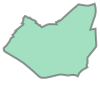

In [358]:
brgy_geo_for_city = brgy_geo.loc[brgy_geo["adm4_pcode"].str.startswith(city_initial_digits)].copy(deep = True)

city_geo = brgy_geo_for_city.union_all()
city_geo

# Image data coords

In [359]:
imgcoords = gpd.GeoDataFrame(pd.read_csv("/Users/migs/Desktop/Repositories/pjdsc_2024_hippothesis/migs/external_datasets/image_data_info/mandaluyong_bounding_box_a_data_2024.csv"))
imgcoords["point"] = gpd.points_from_xy(x = imgcoords["longitude"], y = imgcoords["latitude"])
imgcoords = imgcoords.set_geometry("point").set_crs(epsg = assumed_crs)

imgcoords.head()

,image_id,latitude,longitude,captured_at,camera_type,point
0,1397117104296315,14.577486,121.053517,1712639413000,perspective,POINT (121.05352 14.57749)
1,1641207173294639,14.585101,121.032796,1712461963400,perspective,POINT (121.0328 14.5851)
2,1951363835294303,14.580650,121.050660,1712458490200,perspective,POINT (121.05066 14.58065)
3,2065567220493130,14.575603,121.051709,1712389029200,perspective,POINT (121.05171 14.5756)
4,1361026524571319,14.578383,121.054070,1712638756600,perspective,POINT (121.05407 14.57838)


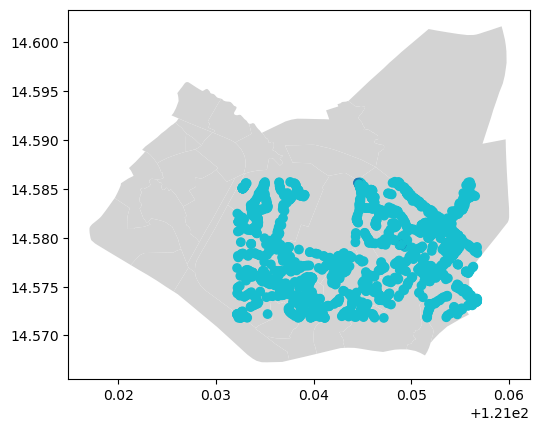

In [360]:
fig, ax = plt.subplots()
brgy_geo_for_city.plot(aspect = 1, ax = ax, color = "lightgray")

imgcoords.plot("camera_type", aspect = 1, ax=ax)
plt.show()

# PBF from geofabrik

cd into the relevant folder first, then:

Version 1

```
osmosis \
    --read-pbf file=philippines-latest.osm.pbf \
    --bounding-polygon file=city_geo.poly \
    --tf accept-ways \
    --tf accept-relations network=ncn,rcn,lcn \
    --used-node \
    --write-pbf output.osm.pbf
```

Version 2 (more permissive, since apparently pyrosm can handle obtaining a cycling network or a walking network)

```
osmosis \
    --read-pbf file=philippines-latest.osm.pbf \
    --bounding-polygon file=city_geo.poly \
    --tf accept-ways \
    --used-node \
    --write-pbf output.osm.pbf
```

## geo inspection

In [361]:
# only use this code when ive filtered the data; use the filtered file
pbf = pyrosm.OSM("external_datasets/geofabrik_filtered/filter_mandaluyong/output.osm.pbf")
nodes, edges = pbf.get_network(nodes = True)
graph = pbf.to_graph(nodes, edges, graph_type = "networkx", force_bidirectional = False, network_type = "cycling", retain_all = False, osmnx_compatible = True)
# retain_all = False means, only keep the largest connected component. Important for later.

In [216]:
nodes, edges = ox.graph_to_gdfs(graph)

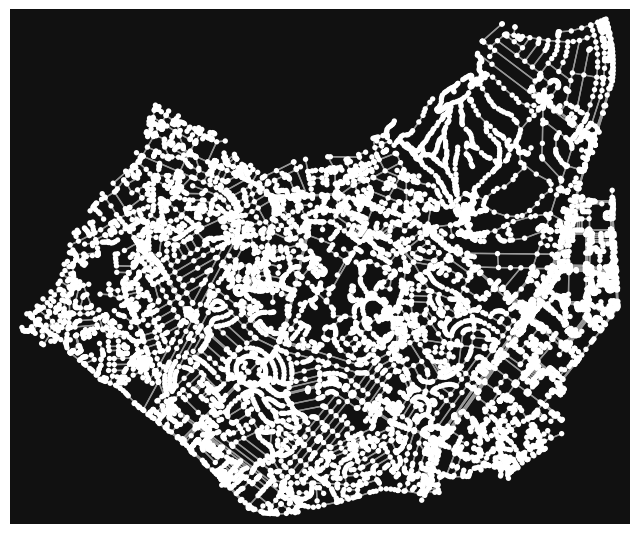

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [217]:
ox.plot_graph(graph)

In [218]:
# # The point of this cell is I compared the bike network to the walk network and they were the same, so i decided to just use one of them.

# pbf = pyrosm.OSM("external_datasets/geofabrik_filtered/output.osm.pbf")
# nodes, edges = pbf.get_network(nodes = True)
# graph2 = pbf.to_graph(nodes, edges, graph_type = "networkx", force_bidirectional = False,
#                      network_type = "walking", # walking, biking, driving, driving+service, all
#                      retain_all = False, # retain_all = False means, only keep the largest connected component. Important for later.
#                      osmnx_compatible = True)

# nx.utils.graphs_equal(graph, graph2)
# # This is True so there is no point in using two separate graphs for walking and biking. Just use one.

In [219]:
edges.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 25148 entries, (np.int64(321734921), np.int64(26365570), np.int64(0)) to (np.int64(12233693925), np.int64(12233693926), np.int64(0))
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   access         8610 non-null   object  
 1   bicycle        328 non-null    object  
 2   bridge         336 non-null    object  
 3   cycleway       734 non-null    object  
 4   foot           1610 non-null   object  
 5   footway        1584 non-null   object  
 6   highway        25148 non-null  object  
 7   int_ref        346 non-null    object  
 8   junction       566 non-null    object  
 9   lanes          8730 non-null   object  
 10  lit            8808 non-null   object  
 11  maxspeed       3956 non-null   object  
 12  motorcar       444 non-null    object  
 13  motor_vehicle  130 non-null    object  
 14  name           10864 non-null  object  
 15  oneway

In [220]:
edges["highway"].value_counts()

highway
service           9316
residential       6166
footway           2842
secondary         1728
tertiary          1706
path              1158
primary            584
unclassified       520
trunk              272
steps              270
pedestrian         152
corridor           116
primary_link        90
busway              70
trunk_link          66
secondary_link      60
tertiary_link       28
living_street        4
Name: count, dtype: int64

In [221]:
edges["cycleway"].value_counts(dropna = False)

cycleway
None           24414
lane             548
shared_lane      130
no                56
Name: count, dtype: int64

In [222]:
edges["sidewalk"].value_counts(dropna = False)

sidewalk
None        18066
both         4704
right        1082
no            900
separate      140
left          126
none           82
yes            48
Name: count, dtype: int64

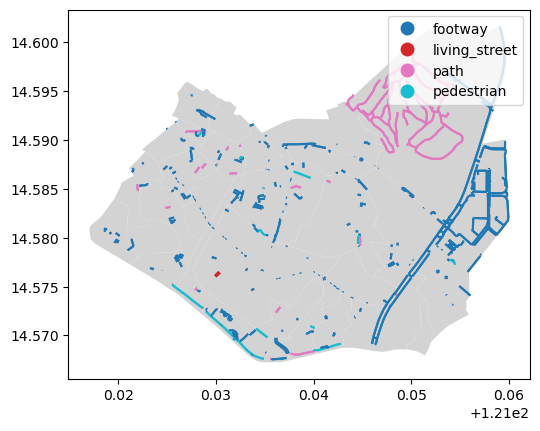

In [223]:
fig, ax = plt.subplots()
brgy_geo_for_city.plot(aspect = 1, ax = ax, color = "lightgray")

edges.loc[
    (edges["highway"].isin(["pedestrian", "footway", "living_street", "path"]))
].plot("highway", aspect = 1, ax = ax, legend = True)
plt.show()

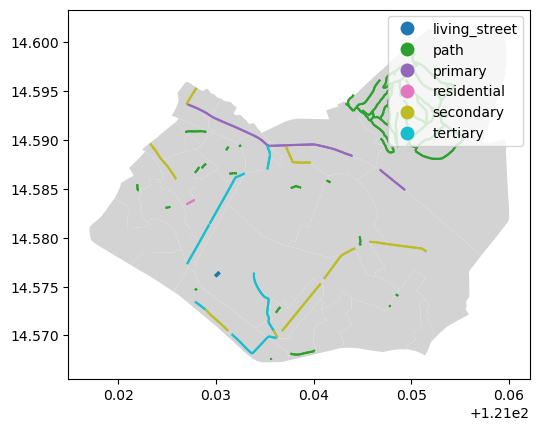

In [224]:
fig, ax = plt.subplots()
brgy_geo_for_city.plot(aspect = 1, ax = ax, color = "lightgray")

edges.loc[
    (edges["cycleway"].isin(["lane", "shared_lane"]))
    | (edges["highway"].isin(["living_street", "path"]))
].plot("highway", aspect = 1, ax = ax, legend = True)
plt.show()

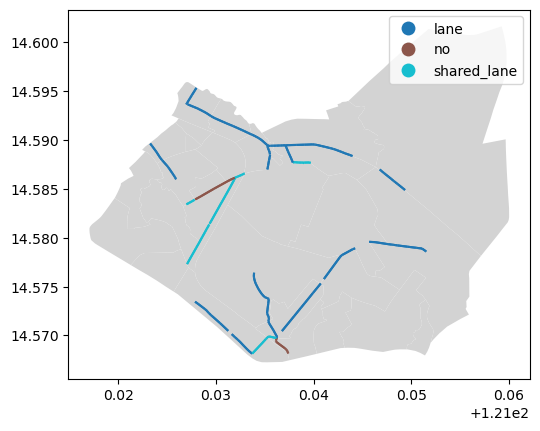

In [225]:
fig, ax = plt.subplots()
brgy_geo_for_city.plot(aspect = 1, ax = ax, color = "lightgray")

edges.loc[
    (edges["cycleway"].isin(["lane", "shared_lane", "no"]))
    # | (edges["highway"].isin(["living_street", "path"]))
].plot("cycleway", aspect = 1, ax = ax, legend = True)
plt.show()

## edge specs

In [226]:
# ACCESS
exclude_access = ["private", "customers", "no", "unknown", "delivery"]

edges["access"].value_counts(ascending = False, dropna = False)

access
None           16538
private         5570
destination     2006
permissive       446
customers        350
no               206
delivery          18
yes               12
unknown            2
Name: count, dtype: int64

<Axes: >

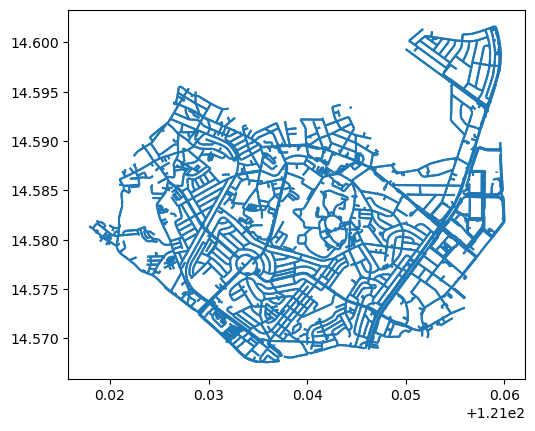

In [227]:
edges.loc[~(edges["access"].isin(exclude_access))].plot(aspect = 1)

In [228]:
# BICYCLE
edges["bicycle"].value_counts(ascending = False, dropna = False)

bicycle
None          24820
yes             270
dismount         34
no               12
permissive       12
Name: count, dtype: int64

In [229]:
edges.loc[(edges["bicycle"] == "dismount"), ["bicycle", "cycleway", "highway"]]

bicycle cycleway  highway
u           v           key                            
9980716601  9980698962  0    dismount     None  footway
            9980716602  0    dismount     None  footway
321305312   1167454767  0    dismount     None  footway
            5430413601  0    dismount     None  footway
747621214   9980698963  0    dismount     None  footway
9980698963  747621214   0    dismount     None  footway
5430413603  321306172   0    dismount     None  footway
1167454767  321305312   0    dismount     None  footway
6773499490  7244796055  0    dismount     None  footway
6544644394  9774074744  0    dismount     None  footway
5430413570  5430413571  0    dismount     None  footway
            5430413574  0    dismount     None  footway
5430413602  321306172   0    dismount     None  footway
5430413571  5430413572  0    dismount     None  footway
            5430413570  0    dismount     None  footway
5430413572  5430413573  0    dismount     None  footway
            5430413571  0    dismount     None  footway
5430413573  5430413578  0    dismount     None  footway
            5430413572  0    dismount     None  footway
5430413601  321305312   0    dismount     None  footway
5430413574  10703150677 0    dismount     None  footway
            5430413570  0    dismount     None  footway
10703150677 10703150676 0    dismount     None  footway
            5430413574  0    dismount     None  footway
10703150676 10703150677 0    dismount     None  footway
5430413578  5430413573  0    dismount     None  footway
321306172   5430413603  0    dismount     None  footway
            5430413602  0    dismount     None  footway
6544644393  9774074744  0    dismount     None  footway
9774074744  6544644394  0    dismount     None  footway
            6544644393  0    dismount     None  footway
9980716602  9980716601  0    dismount     None  footway
9980698962  9980716601  0    dismount     None  footway
7244796055  6773499490  0    dismount     None  footway

In [230]:
# CYCLEWAY
edges["cycleway"].value_counts(ascending = False, dropna = False)

cycleway
None           24414
lane             548
shared_lane      130
no                56
Name: count, dtype: int64

In [231]:
# FOOT
edges["foot"].value_counts(ascending = False, dropna = False)

foot
None            23538
designated       1032
yes               404
use_sidepath      174
Name: count, dtype: int64

In [232]:
# FOOTWAY
edges["footway"].value_counts(ascending = False, dropna = False)

footway
None        23564
sidewalk      938
crossing      600
link           30
alley          16
Name: count, dtype: int64

In [233]:
# HIGHWAY
edges["highway"].value_counts(ascending = False, dropna = False)

highway
service           9316
residential       6166
footway           2842
secondary         1728
tertiary          1706
path              1158
primary            584
unclassified       520
trunk              272
steps              270
pedestrian         152
corridor           116
primary_link        90
busway              70
trunk_link          66
secondary_link      60
tertiary_link       28
living_street        4
Name: count, dtype: int64

In [234]:
# INT_REF
edges["int_ref"].value_counts(ascending = False, dropna = False)

int_ref
None    24802
AH26      346
Name: count, dtype: int64

In [235]:
# JUNCTION
edges["junction"].value_counts(ascending = False, dropna = False)

junction
None          24582
circular        532
roundabout       34
Name: count, dtype: int64

In [236]:
# LANES
edges["lanes"].value_counts(ascending = False, dropna = False)

lanes
None    16418
2        6626
1         960
4         776
3         368
Name: count, dtype: int64

In [237]:
# LIT
edges["lit"].value_counts(ascending = False, dropna = False)

lit
None    16340
yes      8790
no         18
Name: count, dtype: int64

In [238]:
# MAXSPEED
edges["maxspeed"].value_counts(ascending = False, dropna = False)

maxspeed
None    21192
40       1822
60        748
20        496
30        412
10        250
50        106
5         100
15         22
Name: count, dtype: int64

In [239]:
# MOTORCAR
edges["motorcar"].value_counts(ascending = False, dropna = False)

motorcar
None           24704
no               380
yes               60
destination        4
Name: count, dtype: int64

In [240]:
# NAME
edges["name"].value_counts(ascending = False, dropna = False)

name
None                       14284
Boni Avenue                  460
Shaw Boulevard               448
EDSA                         346
Nueve de Pebrero Street      184
                           ...  
Alley 3                        2
Cornell Street                 2
C. Fernando Street             2
Cornwell Street                2
Third Street                   2
Name: count, Length: 418, dtype: int64

In [241]:
# ONEWAY
edges["oneway"].value_counts(ascending = False, dropna = False)

oneway
None           18296
yes             6532
no               308
alternating       12
Name: count, dtype: int64

In [242]:
# ONEWAY
edges["oneway"].value_counts(ascending = False, dropna = False)

oneway
None           18296
yes             6532
no               308
alternating       12
Name: count, dtype: int64

In [243]:
# PATH
edges["path"].value_counts(ascending = False, dropna = False)

path
None     25116
alley       32
Name: count, dtype: int64

In [244]:
# REF
edges["ref"].value_counts(ascending = False, dropna = False)

ref
None    24292
141       448
1         346
184        62
Name: count, dtype: int64

In [245]:
# SERVICE
edges["service"].value_counts(ascending = False, dropna = False)

service
None             20590
driveway          3442
alley              560
parking_aisle      412
drive-through       96
fuel                48
Name: count, dtype: int64

In [246]:
# SEGREGATED
edges["segregated"].value_counts(ascending = False, dropna = False)

segregated
None    25140
no          8
Name: count, dtype: int64

In [247]:
# SIDEWALK
edges["sidewalk"].value_counts(ascending = False, dropna = False)

sidewalk
None        18066
both         4704
right        1082
no            900
separate      140
left          126
none           82
yes            48
Name: count, dtype: int64

In [248]:
# SMOOTHNESS
edges["smoothness"].value_counts(ascending = False, dropna = False)

smoothness
None            24854
good              118
bad               108
intermediate       50
excellent          18
Name: count, dtype: int64

In [249]:
print("No. lanes/shared lanes,    No. lanes/shared lanes with smoothness value")
(edges["cycleway"].notna() & ~edges["cycleway"].isin(["no"])).sum(), (edges["smoothness"].notna() & edges["cycleway"].notna()).sum()

No. lanes/shared lanes,    No. lanes/shared lanes with smoothness value


(np.int64(678), np.int64(42))

In [250]:
edges.loc[edges["smoothness"].notna() & edges["cycleway"].notna(), ["highway", "cycleway", "smoothness"]]

highway     cycleway    smoothness
u           v           key                                     
242925319   242925534   0    tertiary  shared_lane  intermediate
            7230071057  0    tertiary  shared_lane  intermediate
242925375   8377876118  0    tertiary  shared_lane  intermediate
242925534   2184946316  0    tertiary  shared_lane  intermediate
            242925319   0    tertiary  shared_lane  intermediate
21717865    3509432480  0     primary         lane          good
            8176038736  0     primary         lane          good
8374294629  11954633566 0     primary         lane          good
            7259801077  0     primary         lane          good
11954633566 4464249658  0     primary         lane          good
            8374294629  0     primary         lane          good
324228146   12005330150 0     primary         lane          good
4464249659  11659228203 0     primary         lane          good
            4464249660  0     primary         lane          good
11659228203 8176038736  0     primary         lane          good
            4464249659  0     primary         lane          good
8176038736  21717865    0     primary         lane          good
            11659228203 0     primary         lane          good
7230071057  242925319   0    tertiary  shared_lane  intermediate
            7230071058  0    tertiary  shared_lane  intermediate
2184946316  7185202527  0    tertiary  shared_lane  intermediate
            242925534   0    tertiary  shared_lane  intermediate
7185202527  3431912168  0    tertiary  shared_lane  intermediate
            2184946316  0    tertiary  shared_lane  intermediate
3431912168  7185202527  0    tertiary  shared_lane  intermediate
3508423514  7259801077  0     primary         lane          good
            3509432480  0     primary         lane          good
4464249658  11954633566 0     primary         lane          good
4464249660  4464249659  0     primary         lane          good
            12005330150 0     primary         lane          good
8377876118  7223603452  0    tertiary  shared_lane  intermediate
            242925375   0    tertiary  shared_lane  intermediate
7230071058  7230071057  0    tertiary  shared_lane  intermediate
            7223603452  0    tertiary  shared_lane  intermediate
7223603452  7230071058  0    tertiary  shared_lane  intermediate
            8377876118  0    tertiary  shared_lane  intermediate
7259801077  8374294629  0     primary         lane          good
            3508423514  0     primary         lane          good
3509432480  3508423514  0     primary         lane          good
            21717865    0     primary         lane          good
12005330150 4464249660  0     primary         lane          good
            324228146   0     primary         lane          good

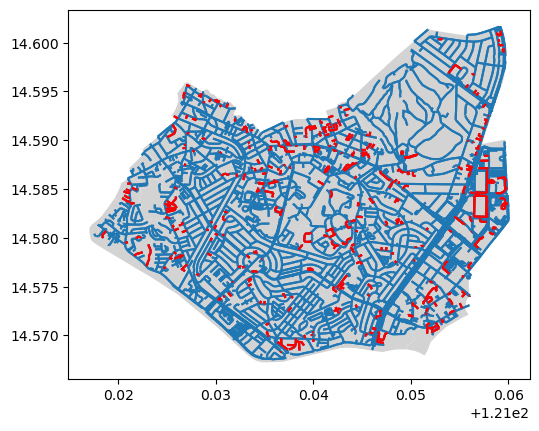

In [251]:
fig, ax = plt.subplots()
brgy_geo_for_city.plot(aspect = 1, ax = ax, color = "lightgray")
edges.plot(aspect = 1, ax = ax, legend = True)
edges.loc[edges["service"]=="driveway"].plot(aspect = 1, ax = ax, color = "red")
plt.show()

In [252]:
# SURFACE
edges["surface"].value_counts(ascending = False, dropna = False)

surface
None               13630
concrete            6236
asphalt             4832
paved                178
paving_stones        148
gravel                66
grass_paver           18
sett                  14
cobblestone           10
unpaved                8
metal                  4
concrete:plates        2
1                      2
Name: count, dtype: int64

In [253]:
# TRACKTYPE
edges["tracktype"].value_counts(ascending = False, dropna = False)

tracktype
None      25146
grade1        2
Name: count, dtype: int64

In [254]:
# TUNNEL
edges["tunnel"].value_counts(ascending = False, dropna = False)

tunnel
None                24982
building_passage      152
yes                    14
Name: count, dtype: int64

In [255]:
edges.loc[(edges["tunnel"] == "yes"), ["bicycle", "foot", "highway", "service"]]

bicycle  foot  highway   service
u          v          key                                 
625426693  625426328  0      None  None  service      None
625426328  625426693  0      None  None  service      None
8186551815 5291586712 0      None  None   busway      None
5291586712 5291586715 0      None  None   busway      None
           8186551815 0      None  None   busway      None
5291586715 5288983031 0      None  None   busway      None
           5291586712 0      None  None   busway      None
5288983031 7579624722 0      None  None   busway      None
           5291586715 0      None  None   busway      None
7579624722 5288983031 0      None  None   busway      None
9951229727 9951229726 0      None  None  service  driveway
9976215281 9951229726 0      None  None  service  driveway
9951229726 9951229727 0      None  None  service  driveway
           9976215281 0      None  None  service  driveway

In [256]:
# WIDTH
edges["width"].value_counts(ascending = False, dropna = False)

width
None    24954
3         130
5          46
4          16
2           2
Name: count, dtype: int64

In [257]:
# # ID
# edges["id"].value_counts(ascending = False, dropna = False)

In [258]:
# TIMESTAMP
edges[["timestamp"]].value_counts(ascending = False, dropna = False)

timestamp 
1559099280    820
1708998671    270
1641475255    262
1717521047    232
1724958320    228
             ... 
1665118336      2
1664962963      2
1661128789      2
1659505913      2
1264387451      2
Name: count, Length: 1025, dtype: int64

In [259]:
# OSM_TYPE
edges[["osm_type"]].value_counts(ascending = False, dropna = False)

osm_type
way         25148
Name: count, dtype: int64

In [260]:
# # U and V
# edges[["u", "v"]].value_counts(ascending = False, dropna = False)

In [261]:
# LENGTH
edges[["length"]].value_counts(ascending = False, dropna = False)

length 
1.761      60
0.848      58
1.885      52
2.682      48
3.393      46
           ..
24.061      2
24.052      2
24.050      2
24.039      2
497.183     2
Name: count, Length: 6641, dtype: int64

## edge tags

In [262]:
edges["tags"]

u            v            key
321734921    26365570     0      {"visible":false,"cycleway:lane":"advisory","c...
             8594662788   0                 {"visible":false,"lane_markings":"no"}
             6320023164   0      {"visible":false,"cycleway:right":"lane","hgv"...
26365570     321734921    0      {"visible":false,"cycleway:lane":"advisory","c...
88776956     9837306160   0                          {"visible":false,"layer":"1"}
                                                       ...                        
12233693922  12233693923  0                                      {"visible":false}
             12233693925  0                                      {"visible":false}
12233693926  12233693925  0                                      {"visible":false}
12233693925  12233693922  0                                      {"visible":false}
             12233693926  0                                      {"visible":false}
Name: tags, Length: 25148, dtype: object

In [263]:
def make_tag_row(tags_str):
    dct = json.loads(tags_str)
    if any([isinstance(v, dict) for v in dct.values()]):
        raise ValueError(f"Tag string of row has a value that is a dictionary.")
    new_row = dct # pd.Series(dct, name = source_index)
    return new_row

In [264]:
def tags_str_col_to_df(tags_str_col):
    rows = []

    # .items() syntax is for newer versions of pandas; if this doesnt work then use .iteritems()
    for i, tags_str in tags_str_col.items():
        if not pd.isnull(tags_str):
            result = make_tag_row(tags_str)
            new_dict = {f"TAG_{key}": value for key, value in result.items()}
            new_dict.update({"HAS_TAG": True})
            new_row = pd.Series(new_dict, name = i)
        else:
            new_row = pd.Series({"HAS_TAG": False}, name = i)
        rows.append(new_row)

    result = pd.concat(rows, join = "outer", axis = 1).transpose()
    return result

In [265]:
edgetags = tags_str_col_to_df(edges["tags"])
edgetags.index.names = edges.index.names
edgetags.shape

(25148, 125)

In [266]:
edgetags.head()

TAG_visible TAG_cycleway:lane TAG_cycleway:right  \
u         v          key                                                    
321734921 26365570   0         False          advisory               lane   
          8594662788 0         False               NaN                NaN   
          6320023164 0         False               NaN               lane   
26365570  321734921  0         False          advisory               lane   
88776956  9837306160 0         False               NaN                NaN   

                         TAG_hgv  TAG_name:etymology  \
u         v          key                               
321734921 26365570   0        no  William James Shaw   
          8594662788 0       NaN                 NaN   
          6320023164 0        no  William James Shaw   
26365570  321734921  0        no  William James Shaw   
88776956  9837306160 0       NaN                 NaN   

                         TAG_name:etymology:wikidata TAG_oneway:bicycle  \
u         v          key                                                  
321734921 26365570   0                     Q27491535                yes   
          8594662788 0                           NaN                NaN   
          6320023164 0                     Q27491535                yes   
26365570  321734921  0                     Q27491535                yes   
88776956  9837306160 0                           NaN                NaN   

                         TAG_wikidata HAS_TAG TAG_lane_markings  ...  \
u         v          key                                         ...   
321734921 26365570   0       Q7491145    True               NaN  ...   
          8594662788 0            NaN    True                no  ...   
          6320023164 0       Q7491145    True               NaN  ...   
26365570  321734921  0       Q7491145    True               NaN  ...   
88776956  9837306160 0            NaN    True               NaN  ...   

                         TAG_step_count TAG_embankment TAG_bus:lanes  \
u         v          key                                               
321734921 26365570   0              NaN            NaN           NaN   
          8594662788 0              NaN            NaN           NaN   
          6320023164 0              NaN            NaN           NaN   
26365570  321734921  0              NaN            NaN           NaN   
88776956  9837306160 0              NaN            NaN           NaN   

                         TAG_survey:name TAG_source:name:mapillary  \
u         v          key                                             
321734921 26365570   0               NaN                       NaN   
          8594662788 0               NaN                       NaN   
          6320023164 0               NaN                       NaN   
26365570  321734921  0               NaN                       NaN   
88776956  9837306160 0               NaN                       NaN   

                         TAG_public_transport TAG_indoor TAG_width:lanes  \
u         v          key                                                   
321734921 26365570   0                    NaN        NaN             NaN   
          8594662788 0                    NaN        NaN             NaN   
          6320023164 0                    NaN        NaN             NaN   
26365570  321734921  0                    NaN        NaN             NaN   
88776956  9837306160 0                    NaN        NaN             NaN   

                         TAG_barrier:personnel TAG_bridge:structure  
u         v          key                                             
321734921 26365570   0                     NaN                  NaN  
          8594662788 0                     NaN                  NaN  
          6320023164 0                     NaN                  NaN  
26365570  321734921  0                     NaN                  NaN  
88776956  9837306160 0                     NaN                  NaN  

[5 rows x 125 columns]

In [267]:
tagcounts = edgetags.notna().sum().sort_values(ascending = False)
tagcounts

TAG_visible             25148
HAS_TAG                 25148
TAG_lane_markings        2432
TAG_cycleway:lane        1682
TAG_cycleway:right       1652
                        ...  
TAG_smoking                 4
TAG_crossing:signals        4
TAG_bus:lanes               2
TAG_public_transport        2
TAG_railway                 2
Length: 125, dtype: int64

In [268]:
inc = 20
counter = 0
for i in range(0, tagcounts.shape[0], inc):
    counter += 1
    print(f"\n{counter}-th group-----------------------")
    df = tagcounts.iloc[i : i+inc]
    print(df)


1-th group-----------------------
TAG_visible                     25148
HAS_TAG                         25148
TAG_lane_markings                2432
TAG_cycleway:lane                1682
TAG_cycleway:right               1652
TAG_source:maxspeed              1596
TAG_name:etymology               1526
TAG_name:etymology:wikidata      1454
TAG_source                       1182
TAG_golf_cart                    1020
TAG_golf                         1020
TAG_alt_name                      840
TAG_lanes:forward                 828
TAG_lanes:backward                828
TAG_parking:lane:both             638
TAG_check_date                    582
TAG_wikidata                      568
TAG_old_name                      552
TAG_covered                       528
TAG_cycleway:separation:left      526
dtype: int64

2-th group-----------------------
TAG_layer                 514
TAG_short_name            450
TAG_mapillary             404
TAG_official_name         380
TAG_fixme                 370
TAG_sid

In [269]:
edgetags["TAG_cycleway:lane"].value_counts(ascending = False, dropna = False)

TAG_cycleway:lane
NaN          23466
advisory      1616
exclusive       34
pictogram       32
Name: count, dtype: int64

In [270]:
edgetags["TAG_cycleway:right"].value_counts(ascending = False, dropna = False)

TAG_cycleway:right
NaN            23496
lane            1532
shared_lane       84
no                18
track             18
Name: count, dtype: int64

In [271]:
edgetags["TAG_parking:both"].value_counts(ascending = False, dropna = False)

TAG_parking:both
NaN    25136
no        12
Name: count, dtype: int64

In [272]:
edgetags["TAG_parking:right"].value_counts(ascending = False, dropna = False)

TAG_parking:right
NaN             25132
lane               12
half_on_kerb        4
Name: count, dtype: int64

In [273]:
edgetags["TAG_sidewalk:right"].value_counts(ascending = False, dropna = False)

TAG_sidewalk:right
NaN         24794
separate      330
yes            24
Name: count, dtype: int64

In [274]:
edgetags["TAG_sidewalk:left"].value_counts(ascending = False, dropna = False)

TAG_sidewalk:left
NaN         25082
yes            54
separate       12
Name: count, dtype: int64

In [275]:
edgetags["TAG_crossing"].value_counts(ascending = False, dropna = False)

TAG_crossing
NaN                24930
uncontrolled         134
zebra                 32
unmarked              22
marked                20
traffic_signals        6
informal               4
Name: count, dtype: int64

In [276]:
edgetags["TAG_covered"].value_counts(ascending = False, dropna = False)

TAG_covered
NaN    24620
yes      528
Name: count, dtype: int64

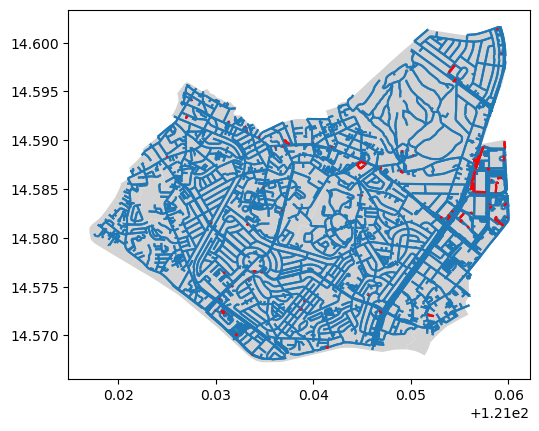

In [277]:
fig, ax = plt.subplots()
brgy_geo_for_city.plot(aspect = 1, ax = ax, color = "lightgray")
edges.plot(aspect = 1, ax = ax, legend = True)

# thing being tested
edges.loc[edgetags["TAG_covered"] == "yes"].plot(aspect = 1, ax = ax, color = "red")

plt.show()

In [278]:
# fig, ax = plt.subplots()
# brgy_geo_for_city.plot(aspect = 1, ax = ax, color = "lightgray")
# edges.plot(aspect = 1, ax = ax, legend = True)

# # thing being tested
# edges.loc[edgetags["TAG_tree_lined"].notna()].plot(aspect = 1, ax = ax, color = "red")
# plt.show()

## filter edges

In [279]:
Gb_edges = edges.copy(deep = True)
Gw_edges = edges.copy(deep = True)

In [280]:
edges["highway"].value_counts(ascending = False, dropna = False)

highway
service           9316
residential       6166
footway           2842
secondary         1728
tertiary          1706
path              1158
primary            584
unclassified       520
trunk              272
steps              270
pedestrian         152
corridor           116
primary_link        90
busway              70
trunk_link          66
secondary_link      60
tertiary_link       28
living_street        4
Name: count, dtype: int64

failed attempt: from an osm xml file from OpenStreetMap website, get wack wack bounding polygon to remove its edges since private yung area.

```
osmosis \
    --read-xml file=wack_wack_club.osm \        
    --write-pbf wack_wack_club_bounding_polygon.osm.pbf
```

`wack_wack_club_osm = pyrosm.OSM("external_datasets/geofabrik_filtered/filter_wack_wack_club/wack_wack_club_bounding_polygon.osm.pbf")`

didnt work.

In [281]:
get_boundary_wwc = False
if get_boundary_wwc:
    boundary_wack_wack_club = ox.geocode_to_gdf("Wack Wack Country Club, Mandaluyong, Philippines")
    boundary_wack_wack_club.to_file("02_outputs/gdf_bounding_polygon_wack_wack_country_club.shp")

boundary_wack_wack_club = gpd.read_file("02_outputs/gdf_bounding_polygon_wack_wack_country_club.shp")

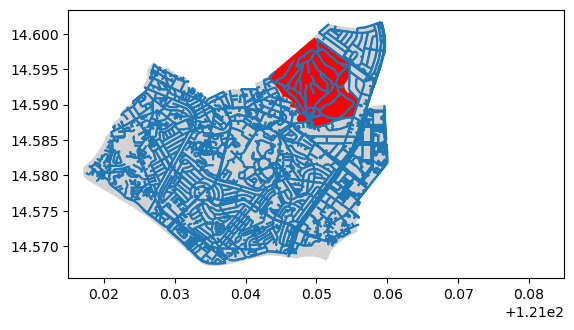

In [282]:
fig, ax = plt.subplots()
brgy_geo_for_city.plot(aspect = 1, ax = ax, color = "lightgray")
edges.plot(aspect = 1, ax = ax, legend = True)
ax.set_xlim(0.015+1.21e2, 0.085+1.21e2)

# thing being tested
boundary_wack_wack_club.plot(aspect = 1, ax = ax, color = "red")

plt.show()

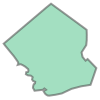

In [283]:
boundary_wack_wack_club.at[0, "geometry"]

In [284]:
edges.loc[edgetags["TAG_oneway:bicycle"].isin(["no"]), ["highway", "foot", "footway", "bicycle", "cycleway"]]["highway"].value_counts(dropna = False)

highway
secondary      14
residential    10
Name: count, dtype: int64

### filter conditions

In [285]:
mask_Gb_edges = (
    (
        (Gb_edges["access"].isin(["yes", "permissive", "destination"])) # PERMIT None
        # | (Gb_edges["access"].isna())

        | Gb_edges["bicycle"].isin(["yes", "permissive", "dismount"]) # PERMIT no, None
        | (Gb_edges["cycleway"].isin(["lane", "shared_lane"])) # PERMIT None
        # | (Gb_edges["cycleway"].isna())

        # junction: permit all

        | (Gb_edges["foot"].isin(["designated", "yes"])) # PERMIT None
        # | (Gb_edges["foot"].isna())
        | (Gb_edges["footway"].isin(["sidewalk", "crossing", "link", "alley"])) # PERMIT None
        # | (Gb_edges["footway"].isna())
        | (Gb_edges["highway"].isin(["footway", "pedestrian", "living_street", "path"])) # note there are never missing values in highway key

        | (Gb_edges["highway"].isin(["residential"]))
        # TEST: only permit these, but include residential
        # | (Gb_edges["highway"].isin(["service", "residential", "primary", "secondary", "tertiary", "unclassified", "trunk", "trunk_link", "primary_link", "secondary_link", "tertiary_link"]))

        | (Gb_edges["service"].isin(["driveway", "alley"])) # PERMIT None
        # | (Gb_edges["service"].isna())

        | (Gb_edges["sidewalk"].isin(["yes", "left", "right", "both"])) # PERMIT no, None

        # TAG-BASED. For each, PERMIT None.
        | (edgetags["TAG_cycleway:lane"].isin(["advisory", "exclusive", "pictogram"]))
        | (edgetags["TAG_cycleway:both"].isin(["lane", "shared_lane", "track"]))
        | (edgetags["TAG_cycleway:right"].isin(["lane", "shared_lane", "track"]))
        | (edgetags["TAG_cycleway:left"].isin(["lane", "shared_lane", "track"]))
        | (edgetags["TAG_sidewalk:right"].isin(["yes"]))
        | (edgetags["TAG_sidewalk:left"].isin(["yes"]))
        # sidewalk_both is not present in the dataset
        | (edgetags["TAG_crossing"].isin(["uncontrolled", "zebra", "unmarked", "marked", "traffic_signals", "informal"]))
        | (edgetags["TAG_oneway:bicycle"].isin(["yes"]))

        # EXTRA filter: expand to include streets that should probably be walkable
        | (
            (Gb_edges["width"].astype(np.float64) <= 3)
            | (Gb_edges["lanes"].astype(np.float64) == 1)
        )
    )
    & (
        # ( (Gb_edges["cycleway"] != "no") | (Gb_edges["bicycle"].isin(["yes", "permissive", "destination"])) ) # NOT SURE. DONT USE THIS FOR NOW
        ~(Gb_edges["access"].isin(["private", "customers", "delivery", "unknown", "no"]))
        # new: PERMIT foot=use_sidepath
        & ~(Gb_edges["highway"].isin(["steps", "corridor", "busway"]))
        & ~(Gb_edges["service"].isin(["drive_through", "parking_aisle", "fuel"]))
        & ~(Gb_edges.intersects(boundary_wack_wack_club.at[0, "geometry"]))
    )
)

mask_Gw_edges = (
    (
        # bicycle, cycleway, junction: permit all

        (Gw_edges["access"].isin(["yes", "permissive", "destination"])) # PERMIT None
        # | (Gw_edges["access"].isna())
        | (Gw_edges["foot"].isin(["designated", "yes", "use_sidepath"])) # PERMIT None
        # | (Gw_edges["foot"].isna())
        | (Gw_edges["footway"].isin(["sidewalk", "crossing", "link", "alley"])) # PERMIT None
        # | (Gw_edges["footway"].isna())
        | (Gw_edges["highway"].isin(["footway", "pedestrian", "living_street", "path", "steps"])) # note there are never missing values in highway key

        | (Gw_edges["highway"].isin(["residential"]))
        # TEST: only permit these, but include residential
        # | (Gw_edges["highway"].isin(["service", "residential", "primary", "secondary", "tertiary", "unclassified", "trunk", "trunk_link", "primary_link", "secondary_link", "tertiary_link"]))

        | (Gw_edges["service"].isin(["driveway", "alley"])) # PERMIT None
        # | (Gw_edges["service"].isna())

        | (Gw_edges["sidewalk"].isin(["yes", "left", "right", "both"])) # PERMIT no, None

        # TAG-BASED. For each, PERMIT None.
        | (edgetags["TAG_sidewalk:right"].isin(["yes"]))
        | (edgetags["TAG_sidewalk:left"].isin(["yes"]))
        # sidewalk_both is not present
        | (edgetags["TAG_crossing"].isin(["uncontrolled", "zebra", "unmarked", "marked", "traffic_signals", "informal"]))

        # EXTRA filter: expand to include streets that should probably be walkable
        | (
            (Gw_edges["width"].astype(np.float64) <= 3)
            | (Gw_edges["lanes"].astype(np.float64) == 1)
        )
    )
    & (
        ~(Gw_edges["access"].isin(["private", "customers", "delivery", "unknown", "no"]))
        & ~(Gw_edges["highway"].isin(["corridor", "busway"]))
        & ~(Gw_edges["service"].isin(["drive_through", "parking_aisle", "fuel"]))
        # added: exclude records where sidewalk is indicated as being mapped separately ("separate")
        & ~(Gw_edges["sidewalk"].isin(["separate"]))
        & ~(Gw_edges.intersects(boundary_wack_wack_club.at[0, "geometry"]))
    )
)

In [286]:
Gb_edges_filtered = Gb_edges.loc[mask_Gb_edges].copy(deep = True)

Gb_edges.shape, Gb_edges_filtered.shape

((25148, 35), (16166, 35))

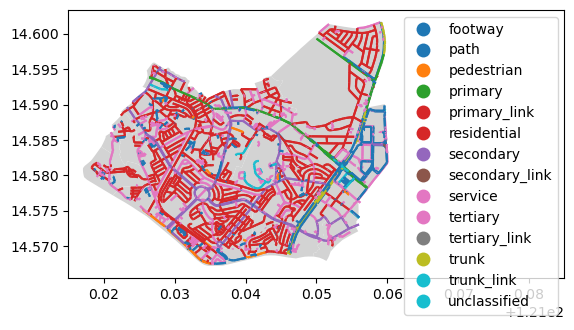

In [287]:
fig, ax = plt.subplots()
brgy_geo_for_city.plot(aspect = 1, ax = ax, color = "lightgray")
# edges.plot(aspect = 1, ax = ax, color = "black") # removed this here since the thing being tested is the filtered edges
ax.set_xlim(0.015+1.21e2, 0.085+1.21e2)

# thing being tested
(Gb_edges_filtered
    # .loc[ Gb_edges_filtered["sidewalk"].isin(["no", "none"])]
    .plot("highway", aspect = 1, ax = ax, legend = True)
)

plt.show()

In [288]:
Gw_edges_filtered = Gw_edges.loc[mask_Gw_edges].copy(deep = True)

Gw_edges.shape, Gw_edges_filtered.shape

((25148, 35), (16046, 35))

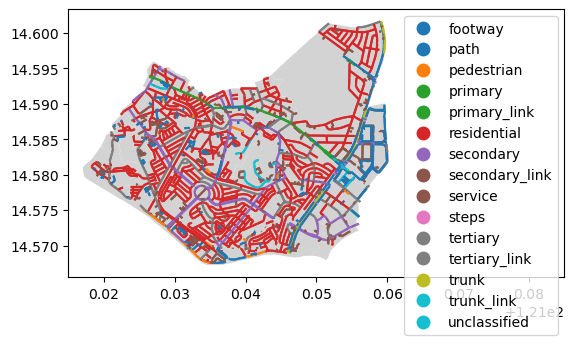

In [289]:
fig, ax = plt.subplots()
brgy_geo_for_city.plot(aspect = 1, ax = ax, color = "lightgray")
# edges.plot(aspect = 1, ax = ax, color = "black") # removed this here since the thing being tested is the filtered edges
ax.set_xlim(0.015+1.21e2, 0.085+1.21e2)

# thing being tested
(Gw_edges_filtered
    # .loc[ Gw_edges_filtered["sidewalk"].isin(["no", "none"])]
    .plot("highway", aspect = 1, ax = ax, legend = True)
)

plt.show()

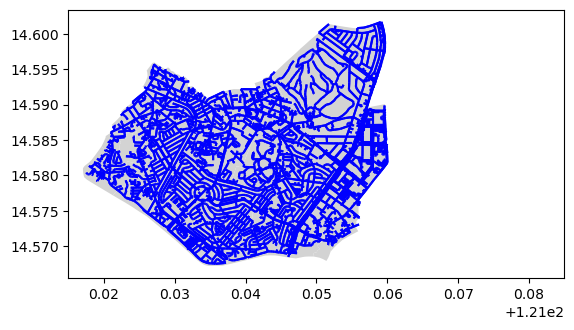

In [290]:
fig, ax = plt.subplots()
brgy_geo_for_city.plot(aspect = 1, ax = ax, color = "lightgray")
edges.plot(aspect = 1, ax = ax, color = "blue") # removed this here since the thing being tested is the filtered edges
ax.set_xlim(0.015+1.21e2, 0.085+1.21e2)

# thing being tested
# (Gw_edges_filtered
#     # .loc[ Gw_edges_filtered["sidewalk"].isin(["no", "none"])]
#     .plot("highway", aspect = 1, ax = ax, legend = True)
# )

plt.show()

## reconstruct graph

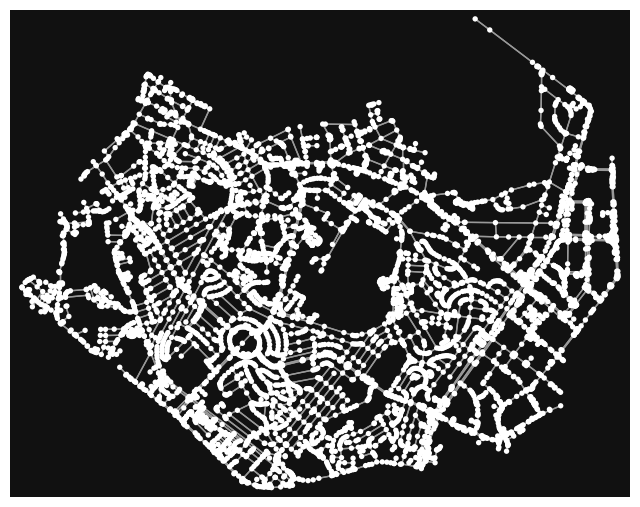

In [291]:
Gb = ox.graph_from_gdfs(nodes, Gb_edges_filtered)
# NEW: retain only the subgraph of the largest connected component
Gb = Gb.subgraph(max(nx.weakly_connected_components(Gb), key = len)).copy()

ox.plot_graph(Gb)
plt.show()

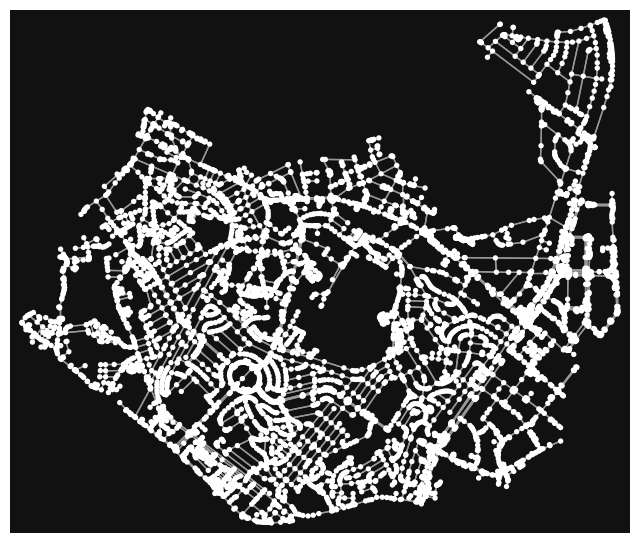

In [292]:
Gw = ox.graph_from_gdfs(nodes, Gw_edges_filtered)
# NEW: retain only the subgraph of the largest connected component
Gw = Gw.subgraph(max(nx.weakly_connected_components(Gw), key = len)).copy()

ox.plot_graph(Gw)
plt.show()

## node tags (rerun this later using the FILTERED nodes, not the original nodes)

In [293]:
Gb_nodes_filtered, Gb_edges_filtered2 = ox.graph_to_gdfs(Gb)
Gw_nodes_filtered, Gw_edges_filtered2 = ox.graph_to_gdfs(Gw)

In [294]:
type(Gb_edges_filtered2["tags"].iloc[0])

str

In [295]:
Gb_nodes_filtered.head()

,visible,changeset,x,y,version,timestamp,osmid,tags,geometry
osmid,,,,,,,,,
321734921,False,0,121.026680,14.593833,19,1720619400,321734921,NaN,POINT (121.02668 14.59383)
26365570,False,0,121.026428,14.593916,19,1638344382,26365570,NaN,POINT (121.02643 14.59392)
8594662788,False,0,121.026741,14.594100,2,1679034468,8594662788,"{'access': 'permissive', 'barrier': 'gate'}",POINT (121.02674 14.5941)
6320023164,False,0,121.026909,14.593757,8,1720619400,6320023164,"{'crossing': 'marked', 'crossing:markings': 'z...",POINT (121.02691 14.59376)
25583974,False,0,121.031441,14.570280,12,1718661935,25583974,NaN,POINT (121.03144 14.57028)


In [296]:
unique_nodetags = Gb_nodes_filtered["tags"].value_counts(ascending = False, dropna = False)
unique_nodetags

tags
NaN                                                                                                                                                               5497
{'noexit': 'yes'}                                                                                                                                                   86
{'access': 'private', 'barrier': 'gate'}                                                                                                                            83
{'traffic_calming': 'hump'}                                                                                                                                         75
{'crossing': 'uncontrolled', 'highway': 'crossing'}                                                                                                                 61
                                                                                                                                                                

In [297]:
# Turns out, unlike the edges dataframe which represents tag dictionaries as strings, the nodes dataframe represents tag dictionaries already as dictionaries.
print(type(unique_nodetags.index[1]))
unique_nodetags.index[1]

<class 'dict'>


{'noexit': 'yes'}

In [298]:
def tags_dict_col_to_df(tags_dict_col):
    rows = []

    # .items() syntax is for newer versions of pandas; if this doesnt work then use .iteritems()
    for i, tags_dict in tags_dict_col.items():
        if not pd.isnull(tags_dict):
            new_dict = {f"TAG_{key}": value for key, value in tags_dict.items()}
            new_dict.update({"HAS_TAG": True})
            new_row = pd.Series(new_dict, name = i)
        else:
            new_row = pd.Series({"HAS_TAG": False}, name = i)
        rows.append(new_row)

    result = pd.concat(rows, join = "outer", axis = 1).transpose()
    return result


In [299]:
Gb_f_nodetags = tags_dict_col_to_df(Gb_nodes_filtered["tags"])
Gb_f_nodetags = Gb_f_nodetags[[col for col in Gb_f_nodetags.columns if Gb_f_nodetags[col].notna().sum() != 0]] # remove columns with all-missing values

Gw_f_nodetags = tags_dict_col_to_df(Gw_nodes_filtered["tags"])
Gw_f_nodetags = Gw_f_nodetags[[col for col in Gw_f_nodetags.columns if Gw_f_nodetags[col].notna().sum() != 0]] # remove columns with all-missing values

Gb_f_nodetags.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6712 entries, 321734921 to 6773491495
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   HAS_TAG                        6712 non-null   object
 1   TAG_access                     440 non-null    object
 2   TAG_barrier                    477 non-null    object
 3   TAG_crossing                   430 non-null    object
 4   TAG_crossing:markings          246 non-null    object
 5   TAG_crossing:signals           22 non-null     object
 6   TAG_highway                    501 non-null    object
 7   TAG_supervised                 148 non-null    object
 8   TAG_mapillary                  263 non-null    object
 9   TAG_survey:date                119 non-null    object
 10  TAG_crossing:island            65 non-null     object
 11  TAG_tactile_paving             69 non-null     object
 12  TAG_source:position            49 non-null     object

In [300]:
Gb_f_nodetags

,HAS_TAG,TAG_access,TAG_barrier,TAG_crossing,TAG_crossing:markings,TAG_crossing:signals,TAG_highway,TAG_supervised,TAG_mapillary,TAG_survey:date,...,TAG_cargo,TAG_addr:housename,TAG_addr:subdistrict,TAG_covered,TAG_survey:name,TAG_fee,TAG_traffic_calming:direction,TAG_motor_vehicle,TAG_description,TAG_layer
321734921,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26365570,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8594662788,True,permissive,gate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6320023164,True,NaN,NaN,marked,zebra,yes,crossing,no,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25583974,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11997820023,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
813134352,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
12101126573,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12101126572,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [301]:
Gb_nodes_filtered.shape, Gb_f_nodetags.shape

((6712, 9), (6712, 82))

In [302]:
Gw_nodes_filtered.shape, Gw_f_nodetags.shape

((6957, 9), (6957, 83))

In [303]:
Gb_f_nodes_final = Gb_nodes_filtered.merge(Gb_f_nodetags, left_index = True, right_index = True)
Gw_f_nodes_final = Gw_nodes_filtered.merge(Gw_f_nodetags, left_index = True, right_index = True)

Gb_f_nodes_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 6712 entries, 321734921 to 6773491495
Data columns (total 91 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   visible                        6712 non-null   bool    
 1   changeset                      6712 non-null   int64   
 2   x                              6712 non-null   float64 
 3   y                              6712 non-null   float64 
 4   version                        6712 non-null   int64   
 5   timestamp                      6712 non-null   int64   
 6   osmid                          6712 non-null   int64   
 7   tags                           1215 non-null   object  
 8   geometry                       6712 non-null   geometry
 9   HAS_TAG                        6712 non-null   object  
 10  TAG_access                     440 non-null    object  
 11  TAG_barrier                    477 non-null    object  
 12  TAG_crossing     

In [304]:
Gw_f_nodes_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 6957 entries, 321734921 to 6773491495
Data columns (total 92 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   visible                        6957 non-null   bool    
 1   changeset                      6957 non-null   int64   
 2   x                              6957 non-null   float64 
 3   y                              6957 non-null   float64 
 4   version                        6957 non-null   int64   
 5   timestamp                      6957 non-null   int64   
 6   osmid                          6957 non-null   int64   
 7   tags                           1229 non-null   object  
 8   geometry                       6957 non-null   geometry
 9   HAS_TAG                        6957 non-null   object  
 10  TAG_access                     457 non-null    object  
 11  TAG_barrier                    494 non-null    object  
 12  TAG_crossing     

## MERGE edge tags

In [305]:
"b", Gb_edges_filtered2.shape, "w", Gw_edges_filtered2.shape

('b', (14878, 33), 'w', (15332, 33))

In [306]:
Gb_f_edgetags = edgetags.loc[mask_Gb_edges]

Gb_edges_filtered.shape, Gb_f_edgetags.shape

((16166, 35), (16166, 125))

In [307]:
Gw_f_edgetags = edgetags.loc[mask_Gw_edges]

Gw_edges_filtered.shape, Gw_f_edgetags.shape

((16046, 35), (16046, 125))

In [308]:
# important: use the 2nd (suffixed with "2") versions of the filtered edges.
Gb_f_edges_final = Gb_edges_filtered2.merge(Gb_f_edgetags, left_index = True, right_index = True)
Gw_f_edges_final = Gw_edges_filtered2.merge(Gw_f_edgetags, left_index = True, right_index = True)

In [309]:
Gb_f_edges_final.columns

Index(['highway', 'lanes', 'lit', 'maxspeed', 'name', 'oneway', 'ref',
       'sidewalk', 'surface', 'osmid',
       ...
       'TAG_step_count', 'TAG_embankment', 'TAG_bus:lanes', 'TAG_survey:name',
       'TAG_source:name:mapillary', 'TAG_public_transport', 'TAG_indoor',
       'TAG_width:lanes', 'TAG_barrier:personnel', 'TAG_bridge:structure'],
      dtype='object', length=158)

In [310]:
Gw_f_edges_final.columns

Index(['highway', 'lanes', 'lit', 'maxspeed', 'name', 'oneway', 'ref',
       'sidewalk', 'surface', 'osmid',
       ...
       'TAG_step_count', 'TAG_embankment', 'TAG_bus:lanes', 'TAG_survey:name',
       'TAG_source:name:mapillary', 'TAG_public_transport', 'TAG_indoor',
       'TAG_width:lanes', 'TAG_barrier:personnel', 'TAG_bridge:structure'],
      dtype='object', length=158)

## SAVE

In [311]:
folder = "02_outputs/edges_nodes_filtered_final/"

Gb_f_edges_final.to_file(folder + "geofabrik_bike_graph_edges.geojson", driver = "GeoJSON")
Gb_f_nodes_final.to_file(folder + "geofabrik_bike_graph_nodes.geojson", driver = "GeoJSON")
Gw_f_edges_final.to_file(folder + "geofabrik_walk_graph_edges.geojson", driver = "GeoJSON")
Gw_f_nodes_final.to_file(folder + "geofabrik_walk_graph_nodes.geojson", driver = "GeoJSON")